<h2> Plot a horizontal map of gridded radar data</h2>

<h4>This script loads in a binary file of gridded tail Doppler radar from the NOAA P-3 produced by the windsyn program (NOAA NSSL) - a software package that performs a quasi-dual-Doppler analysis and outputs gridded data product.</h4>

In [2]:
# Load the needed packages
from glob import glob
import os
import matplotlib.pyplot as plt

from awot.io import read_p3_radar
from awot.graph.common import create_basemap
from awot.graph import RadarHorizontalPlot
from awot.graph import FlightLevel

%matplotlib inline

<b>Set variables</b>

In [3]:
# Set some required information
# Choose the date of flight and module name
yymmdd, modn = '030610', '0528hn'
# Set the project name
Project="BAMEX"
# Set Directory path for data
fDir = "/Users/guy/data/bamex/radar"

# Construct the full path name for windsyn NetCDF file
P3Radf = fDir+modn+"hn"

<ul><b>Set up some characteristics for plotting. </b>
  <li>Use Cylindrical Equidistant Area map projection.</li>
  <li>Set the spacing of the barbs and X-axis time step for labels.</li>
  <li>Set the start and end times for subsetting.</li>
  <li>Set the lon/lat spacing for the basemap</li>
</ul>

In [4]:
# Set map projection to use
proj = 'cea'

Wbarb_Spacing = 300 # Spacing of wind barbs along flight path (sec)

# Choose the X-axis time step (in seconds) where major labels will be
XlabStride = 3600

start_time = "2003-06-10 05:28:00"
end_time = "2003-06-10 05:38:00"
corners = [-96.5, 40.0, -95., 41.5]

# Set the lon/lat spacing for basemap
dLon = 0.3
dLat = 0.3

<b>Create a map plot</b>

Closest level:  2.0


/Users/guy/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:90: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/guy/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:667: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


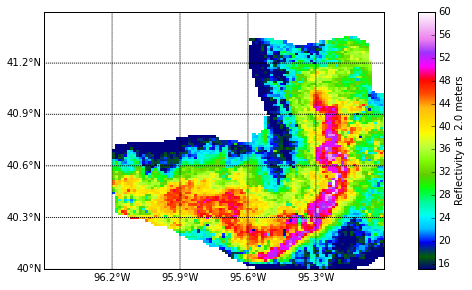

In [5]:
# Creating axes outside seems to screw up basemap
fig, ax = plt.subplots(1, 1, figsize=(7, 7))


# Get the tail radar data
# When the binary file_format is selected AWOT looks for a .dpw and .hdr file,
# both of which are produced by windsyn and are needed for program to work properly
r = read_p3_radar.read_windsyn_binary(os.path.join(fDir,modn))

# Set the map for plotting
bm = create_basemap(proj=proj, resolution='l', area_thresh=1.,corners=corners, 
                   lat_spacing=dLat, lon_spacing=dLon, ax=ax)

# Create a RadarGrid
rgp = RadarHorizontalPlot(r, basemap=bm)
rgp.plot_cappi('reflectivity', 2., vmin=15., vmax=60.,
              color_bar=True, cb_pad="10%")#, ax=fl.basemap.ax)

Closest level:  2.0

********************


Writing AWOT track KMZ file:
(-96.199996948242188, -94.527258761233355)
(39.900001525878906, 41.505290592443842)
Google Earth image saved to: /Users/guy/software/python/awot/examples/awot_unknown_windsyn_030610E _altitude.kmz

********************




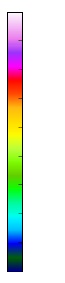

In [6]:
# Creating axes outside seems to screw up basemap
fig, ax = plt.subplots(1, 1, figsize=(7, 7))


# Get the tail radar data
# When the binary file_format is selected AWOT looks for a .dpw and .hdr file,
# both of which are produced by windsyn and are needed for program to work properly
r = read_p3_radar.read_windsyn_binary(os.path.join(fDir,modn))

# Set the map for plotting
bm = create_basemap(proj=proj, resolution='l', area_thresh=1.,corners=corners, 
                   lat_spacing=dLat, lon_spacing=dLon, ax=ax)

# Create a RadarGrid
rgp = RadarHorizontalPlot(r, basemap=bm)
rgp.plot_cappi('reflectivity', 2., vmin=15., vmax=60., color_bar=True, cb_pad="10%",
              save_kmz=True)